In [1]:
# Install modul-modul yang diperlukan dalam tugas ini, 
# yaitu numpy, OpenCV, scikit-image, dan matplotlib

#!pip install numpy opencv-python matplotlib
%pip install numpy opencv-python matplotlib scikit-image

Note: you may need to restart the kernel to use updated packages.


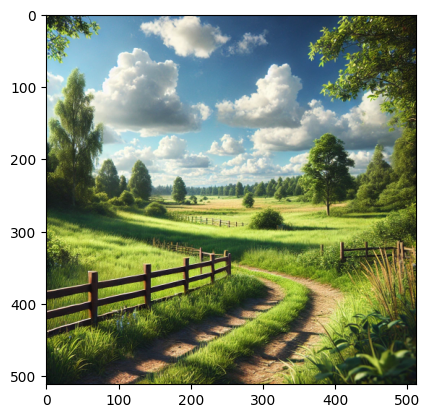

In [1]:
# Muat modul-modul yang diperlukan
import numpy as np
import cv2
from skimage.feature import hog # untuk representasi HOG
import matplotlib.pyplot as plt

# Ambil gambar dari direktori file lokal
image_path = "example_image.png"

# Menampilkan gambar asli sebagai perbandingan
# Ukuran gambar dapat dilihat pada plotting
image = plt.imread(image_path)
plt.imshow(image)

# Moving average

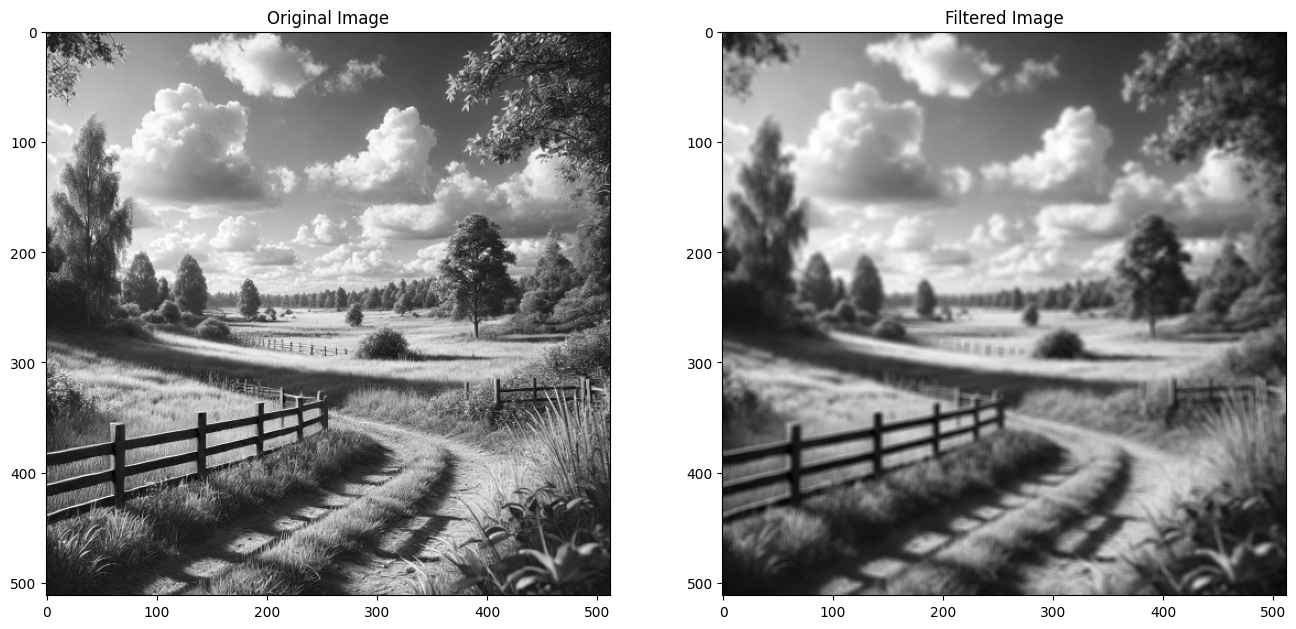

In [2]:
image = cv2.imread(image_path, 0) # Gambar dibaca dalam bentuk grayscale

# Buat kernel moving average 
# yang merupakan matriks satuan dengan dimensi 3x3
kernel = np.ones((5, 5), np.float32) /25

# Terapkan filter
filtered_image = cv2.filter2D(image, -1, kernel)

# Tampilkan hasil dengan matplotlib
plt.figure(figsize=(16, 10))
# Menampilkan gambar yang di-grayscale
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
# Menampilkan gambar yang difilter dengan moving average
plt.subplot(1, 2, 2), plt.imshow(filtered_image, cmap='gray'), plt.title('Filtered Image')
plt.show()

# SIFT (Scale-invariant Feature Transform)

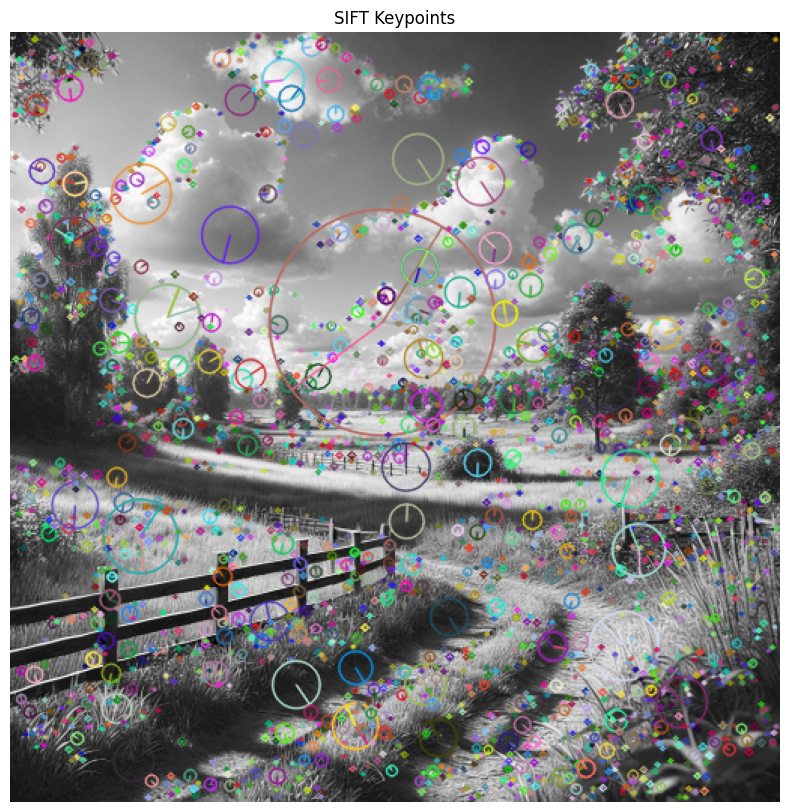

In [3]:
image = cv2.imread(image_path, 0) # Gambar dibaca dalam bentuk grayscale

# Buat SIFT detector
sift = cv2.SIFT_create()

# Deteksi keypoints dan deskriptor
keypoints, descriptors = sift.detectAndCompute(image, None)

# Gambar keypoints
img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Tampilkan hasil
plt.figure(figsize=(16, 10))
# Menampilkan gambar grayscale dengan keypoint SIFT
plt.imshow(img_with_keypoints)
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()

# Visualisasi Histogram

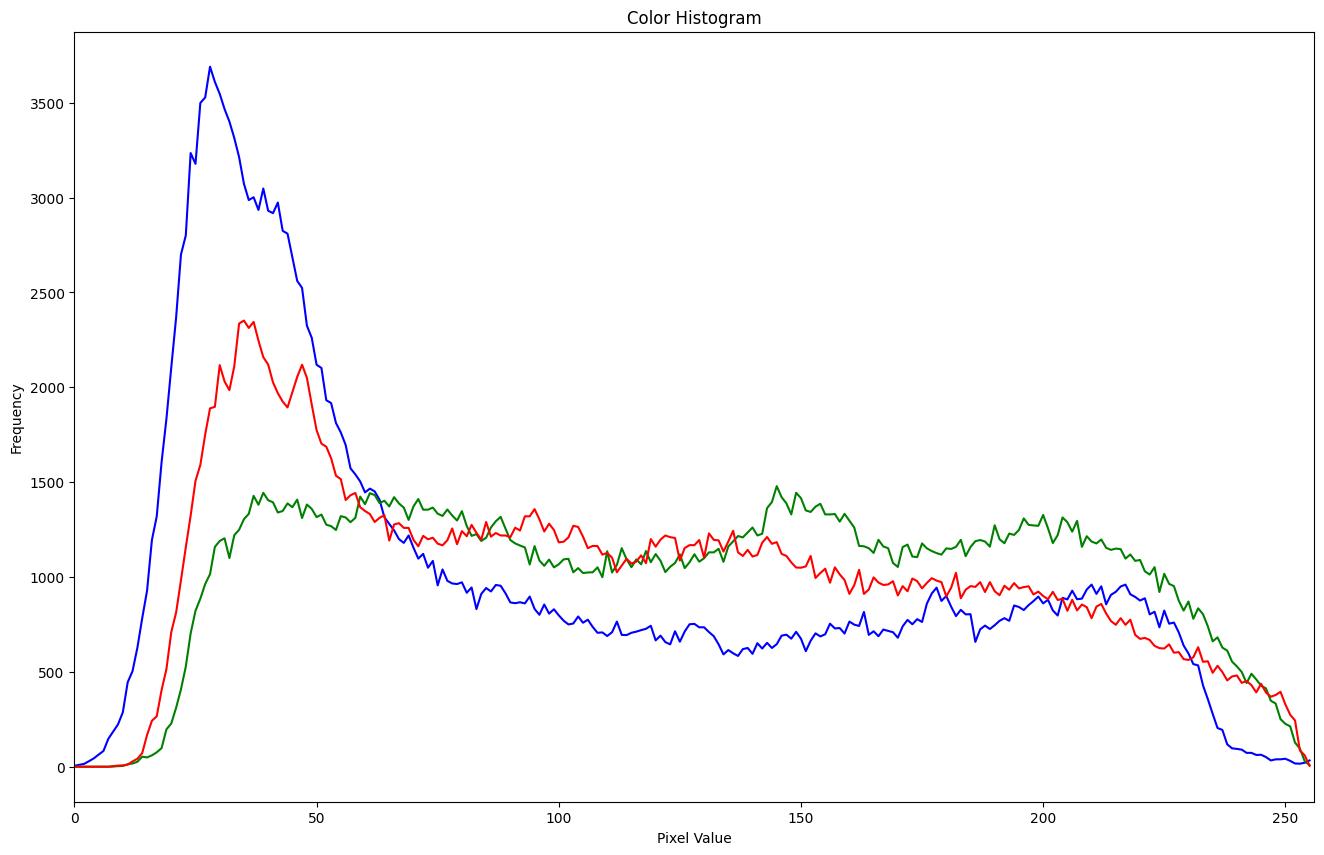

In [4]:
image = cv2.imread(image_path) # Gambar dibaca sepenuhnya 

# Pisahkam channel warna dan buat histogram
colors = ('b', 'g', 'r')

# Tampilkan hasil
plt.figure(figsize=(16, 10))
# Membuat Histogram berdasarkan value pixel dan frekuensi untuk masing-masing warna
for i, color in enumerate(colors):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
plt.title('Color Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Gaussian Blurring

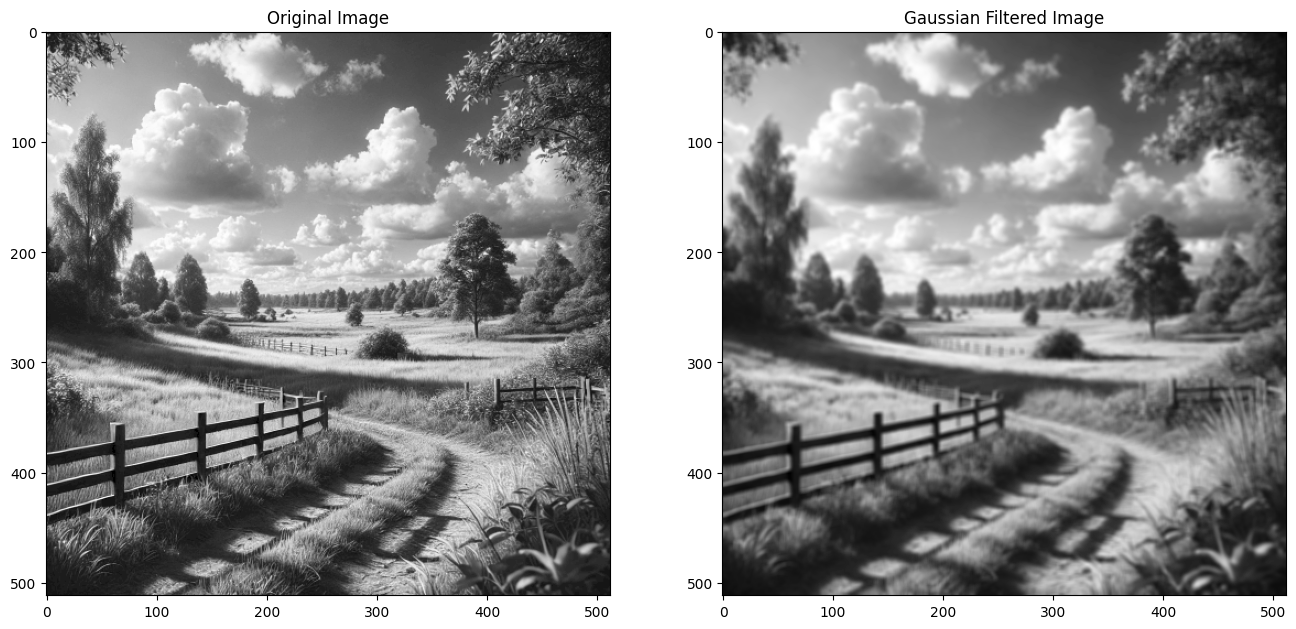

In [5]:
image = cv2.imread(image_path, 0) # Baca gambar dalam grayscale

# Terapkan Gaussian blur
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 2)

# Tampilkan hasil
plt.figure(figsize=(16, 10))
# Menampilkan gambar asli yang di-grayscale
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
# Menampilkan gambar yang difilter menggunakan Gaussian Blur
plt.subplot(1, 2, 2), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian Filtered Image')
plt.show()

# Sobel Filter

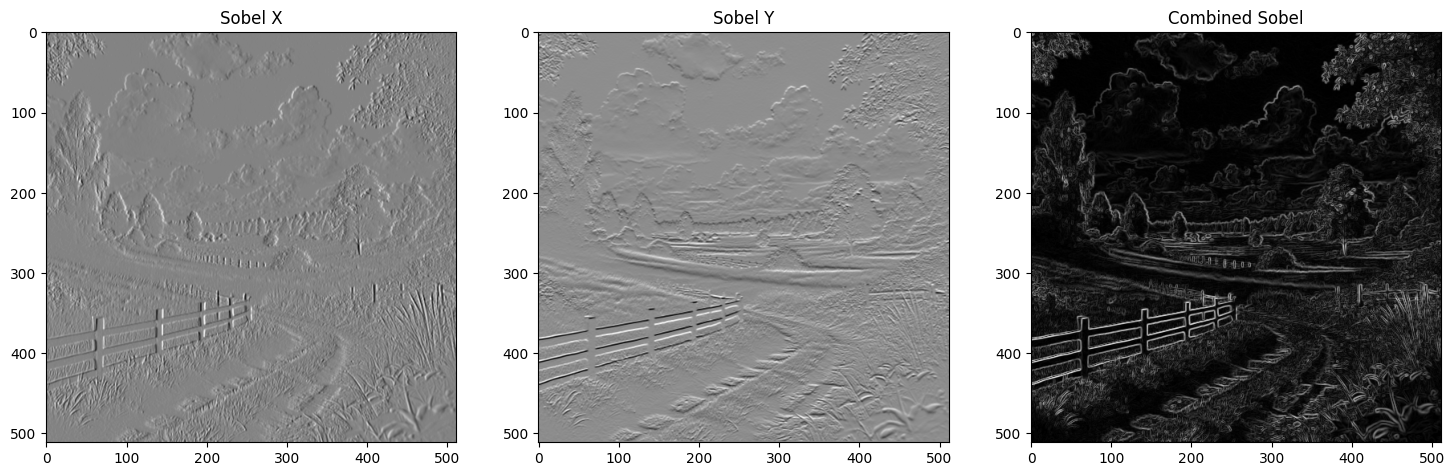

In [6]:
image = cv2.imread(image_path, 0) # Baca gambar dalam grayscale

# Terapkan Sobel filter
# sobel_x mendeteksi garis-garis tepi horizontal
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3) 
# sobel_y mendeteksi garis-garis tepi vertikal
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3) 
# sobel_combined menggabungkan kedua gambar terfilter di atas
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Tampilkan hasil: gambar yang difilter menggunakan Sobel Filter
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Combined Sobel')
plt.show()

# Repersentasi HOG (Histogram of Oriented Gradients)

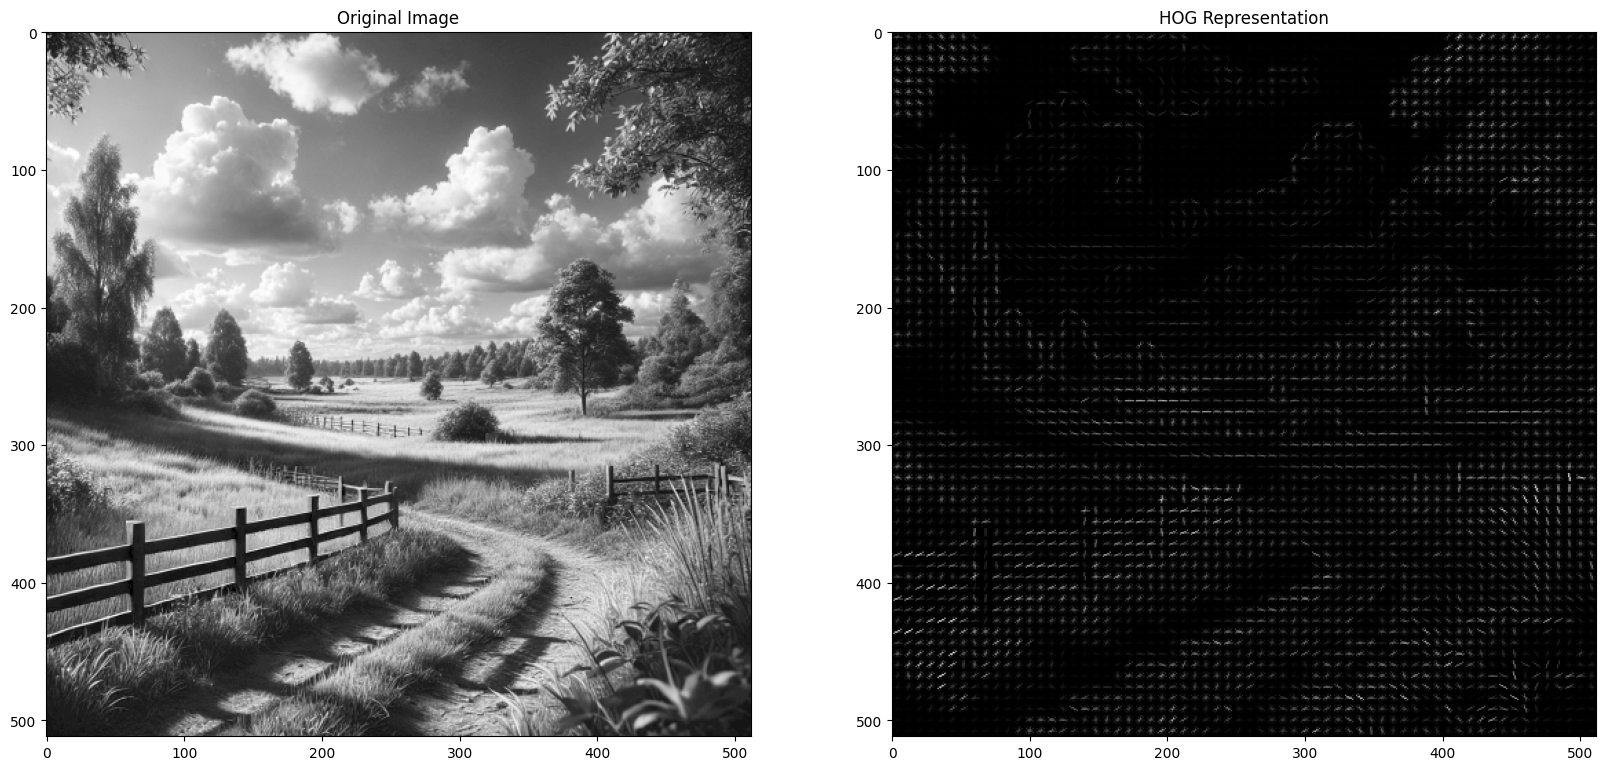

In [7]:
image = cv2.imread(image_path, 0) # Baca gambar dalam grayscale

# Ekstraksi fitur HOG dengan parameter yang disesuaikan
features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
    cells_per_block=(2, 2), visualize=True, channel_axis=None)

# Normalisasi HOG image dengan scaling manual jika normalisasi default gagal
hog_image_normalized = (hog_image - hog_image.min()) / (hog_image.max() - hog_image.min()) * 255
# Konversi ke uint8 untuk visualisasi
hog_image_normalized = np.uint8(hog_image_normalized) 

# Tampilkan hasil
plt.figure(figsize=(20, 10))
# Menampilkan gambar asli yang di-grayscale
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
# Menampilkan gambar representasi HOG
plt.subplot(1, 2, 2), plt.imshow(hog_image_normalized, cmap='gray'), plt.title('HOG Representation')
plt.show()